In [15]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.ndimage import zoom
import imageio
from PIL import Image
from skimage.registration import phase_cross_correlation
import matplotlib.animation as animation
import pylab as pl
from IPython import display
import time
from scipy.stats import poisson
import os
import sys
import importlib

In [38]:
sys.path.append(os.path.abspath('gpfs/cfel/user/butolama/Bragg_NF_Ptycho/'))
import FPM.data_generator.data_gen as fpd
import FPM.data_generator.improcess as imp
import FPM.data_generator.objects as obj
import FPM.data_generator.get_plot as fpp

import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)

In [39]:
# refreshes
importlib.reload(fpd)
importlib.reload(imp)
importlib.reload(obj)
importlib.reload(fpp)

<module 'FPM.data_generator.get_plot' from '/gpfs/cfel/user/butolama/Bragg_NF_Ptycho/FPM/data_generator/get_plot.py'>

## Initialization

In [40]:
class Exp:

    wavelength = 0.63e-6 
    arraysize = 25
    pt_source_gap = 0.1
    source_object_distance = 90
    comp_window = 1024
    det_psize = 2.75e-6 #9.5e-9     #-----Sampling or pixel size of the CCD-----
    recon_psize = det_psize/4       #-----Final pixel size of reconstruction
    NA = 0.08 

exp = Exp()


In [41]:

fpm = fpd.generate_data(
    wavelength = exp.wavelength,
    arraysize = exp.arraysize,
    pt_source_gap = exp.pt_source_gap,
    source_object_distance = exp.source_object_distance,
    comp_window = exp.comp_window,
    det_psize = exp.det_psize,
    recon_psize = exp.recon_psize,
    NA = exp.NA
)

## Loading the Object

In [42]:
fpm.define_object(comp_window= exp.comp_window, recon_psize = exp.recon_psize ) # For Vortex Phase

# fpm.load_object(amp_path = "Analysis_codes/Fourier-Ptychography/Ptychography/images/penguin.jpeg",
#                 phase_path= "Analysis_codes/Fourier-Ptychography/Ptychography/images/USAF_chart.jpg",
#                comp_window = exp.comp_window
#                )




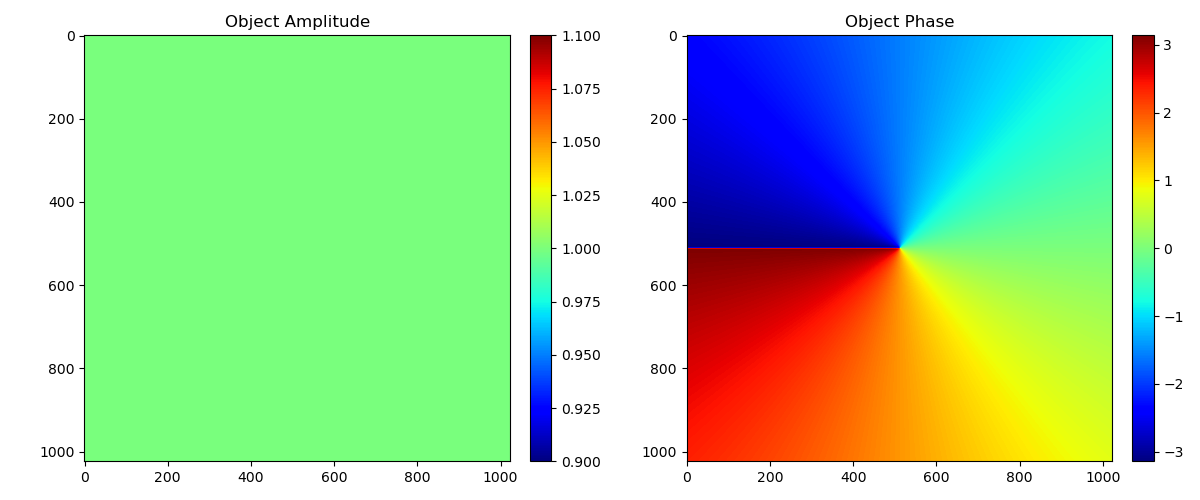

In [43]:
%matplotlib ipympl
fpm.plot_object()

## Loading Source

In [44]:
fpm.define_source(arraysize = exp.arraysize,
                  pt_source_gap = exp.pt_source_gap, 
                  source_object_distance = exp.source_object_distance, 
                  wavelength = exp.wavelength, 
                  recon_psize = exp.recon_psize
                 )

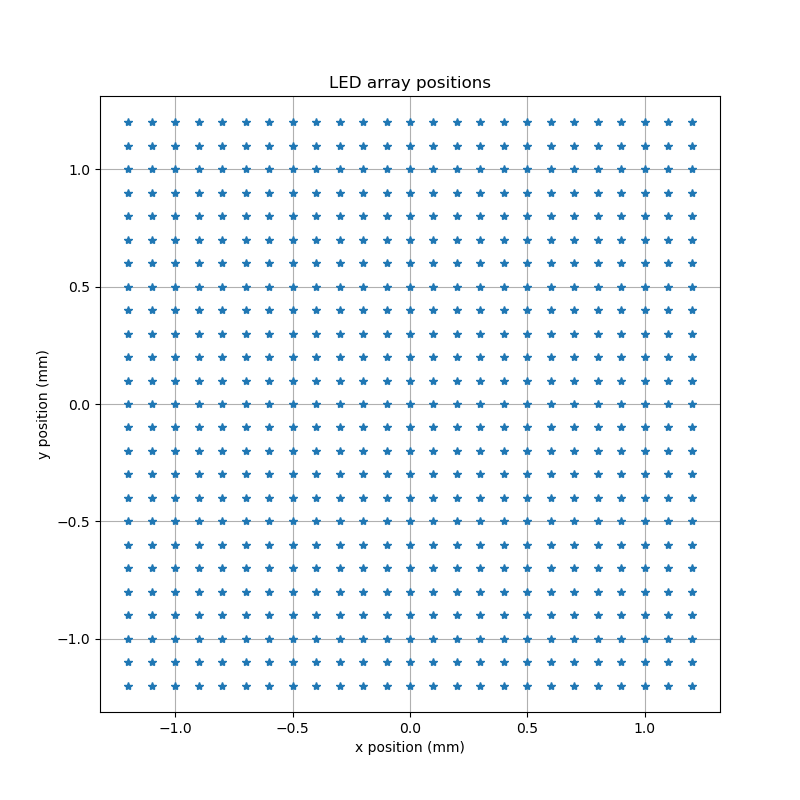

In [45]:
fpm.plot_source()

## Genrate image data -> Low resolution images of the object

In [46]:
fpm.generate_coherent_imgs( exp.det_psize, exp.recon_psize, exp.arraysize)

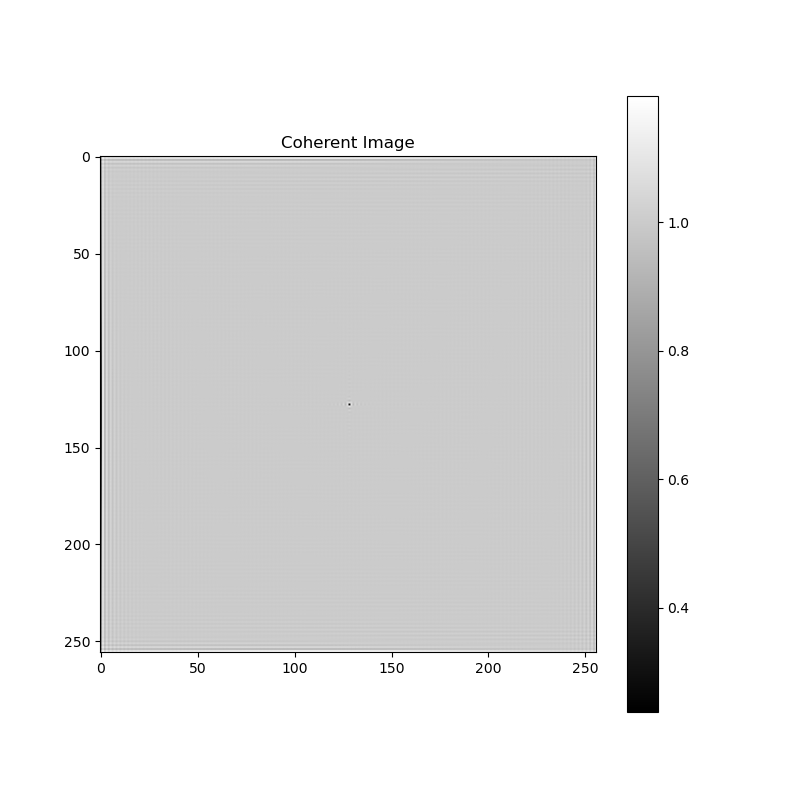

In [47]:
%matplotlib ipympl
idx = 115
fpm.plot_coherent_imgs(exp.arraysize, idx)

## Generate Image Data -> From tilted plane wave Illumination

In [48]:
fpm.generate_coherent_imgs_RSmodel( arraysize = exp.arraysize, recon_psize = exp.recon_psize)

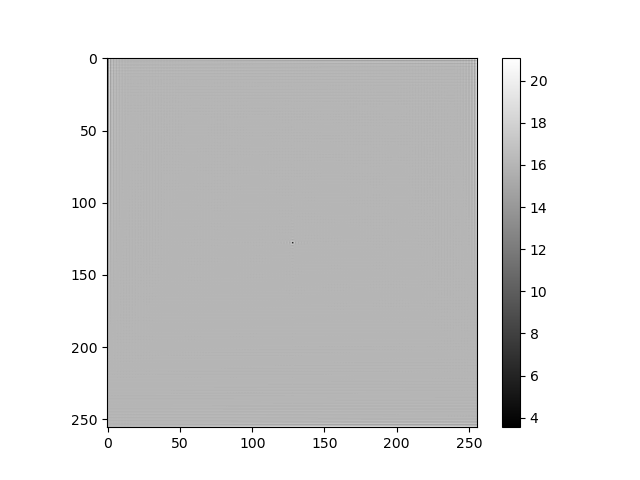

In [51]:
plt.figure()
plt.imshow(np.abs(fpm.imSewLowRes_data[115]), cmap = 'gray')
plt.colorbar()
plt.show()

-132965.6481751386

1142397.3285781066

In [ ]:
self.images = images 
self.num_images = self.images.shape[0]
self.pupil = pupil
self.k_vector = k_vector
self.DS_fac = DS_fac
self.det_psize = det_psize
self.objectLength = objectLength # fpm.objectLength

self.DS_psize = det_psize*DS_fac # Downsampled Pixel Size